# Determinant

Author: [Zeel B Patel](https://patel-zeel.github.io/), [Nipun Batra](https://nipunbatra.github.io/)

In this notebook, we will look at determinants. https://youtu.be/Ip3X9LOh2dk

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', size=16)
rc('text', usetex=True)

## Transformation of N-D space

Consider a N-D vector $\mathbf{v}_1$. We can get a transformed N-D vector $\mathbf{v}_1'$ by applying an appropriate linear transformation $A$ on $\mathbf{v}_1$.    

Note that $A$ will be a $N \times N$ matrix here. This transformarion is given as,

$$
\mathbf{v}_1' = A\mathbf{v}_1
$$

### 1D case

If $\mathbf{v}_1$ is a scaler, we get transformed scaler $\mathbf{v}_2$ by applying transformation $A$. $A$ would also be a scaler here.  

If $\mathbf{v}_1=3$, $A=5$ then $\mathbf{v}_1' = 5 \cdot 3 = 15$.

Ultimately, $\mathbf{v}_1'$ is $\mathbf{v}_1$ scaled by factor of $A$.

### 2D case

consider two vectors $\mathbf{v}_1$ and $\mathbf{v}_2$. We will focus on the area of the parallelogram spaned by these vectors.

$$
\mathbf{v}_1 =
\begin{bmatrix}
0\\
1
\end{bmatrix}, 
\mathbf{v}_2 =
\begin{bmatrix}
1\\
0
\end{bmatrix}
$$

In [9]:
def get_area(v1, v2):
    return np.abs(np.sum(np.cross(v1.ravel(), v2.ravel())))

In [10]:
def plot_area(v1, v2, suffix='', annotate=False, c='b'):
    vectors = [v1, v2]
    for vi, v in enumerate(vectors, 1):
        plt.arrow(x=0, y=0, dx=v[0, 0], dy=v[1, 0], shape='full', 
                  head_width=0.2, head_length=0.2, length_includes_head=True, color=c)
        if annotate:
            plt.text(v[0, 0]-0.5, v[1, 0]+0.1, f'v{vi}{suffix}=({v[0, 0]}, {v[1, 0]})')

    ## Filling the area
    plt.fill([0, v1[0,0], v1[0,0]+v2[0,0], v2[0,0]], 
             [0, v1[1,0], v1[1,0]+v2[1,0], v2[1,0]], alpha=0.4, label=f'area = {get_area(v1, v2)}')
    
    plt.text(0-0.5, 0+0.1, f'({0}, {0})')
    plt.grid()
    plt.ylim(np.min([0, v1[1,0], v2[1,0]])-1, v1[1,0]+v2[1,0]+1)
    plt.xlim(np.min([0, v1[0,0], v2[0,0]])-1, v1[0,0]+v2[0,0]+1)
    plt.xlabel('x');plt.ylabel('y');
    if annotate:
        plt.legend(bbox_to_anchor=(1,1))

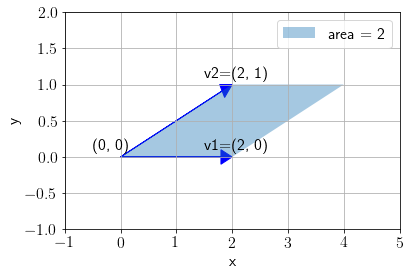

In [11]:
vec1 = np.array([2, 0]).reshape(-1,1)
vec2 = np.array([2, 1]).reshape(-1,1)

plot_area(vec1, vec2, annotate=True)

Let us apply the following linear tranformation on $\mathbf{v_1}$ and $\mathbf{v_2}$. 

$$
A = 
\begin{bmatrix}
2 & 1\\
2 & 3
\end{bmatrix}
$$

In [12]:
def plot_transform(v1, v2, A, annotate=False):
    plot_area(v1, v2, annotate=annotate)
    xlim, ylim = plt.xlim(), plt.ylim()
    
    v1_, v2_ = A@v1, A@v2
    
    plot_area(v1_, v2_, suffix='\'', annotate=annotate, c='r')
    
    plt.xlim(min(plt.xlim()[0], xlim[0]), max(plt.xlim()[1], xlim[1]))
    plt.ylim(min(plt.ylim()[0], ylim[0]), max(plt.ylim()[1], ylim[1]))
    plt.title(f'Area should be scaled by $|A|={np.linalg.det(A)}$')

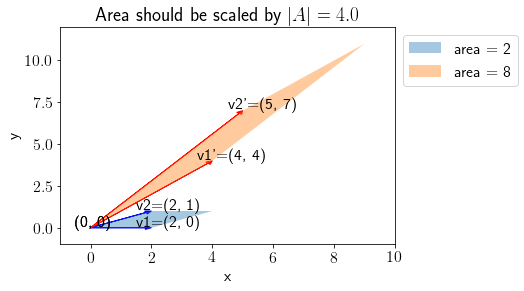

In [13]:
A = np.array([[2, 1], [2, 3]])

plot_transform(vec1, vec2, A, annotate=True)

Note that the area spanned by $\mathbf{v}_1'$ and $\mathbf{v}_2'$ is scaled by factor factor of $|A|$ (determinant of $A$). More concretely,

$$
\text{Area}(\mathbf{v}_1', \mathbf{v}_2') = |A| \cdot \text{Area}(\mathbf{v}_1, \mathbf{v}_2)
$$

Let us choose one more example of $A$,

$$
A = 
\begin{bmatrix}
2 & 4\\
1 & 2
\end{bmatrix}
$$

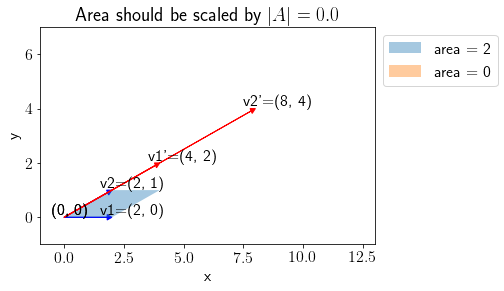

In [14]:
A = np.array([[2, 4], [1, 2]])

plot_transform(vec1, vec2, A, annotate=True)

Note that because $|A|=0$, area spanned by transformed vectors is $0$ and thus the plane spanned squeezes to a line. 

For a 3D case, $|A|$ will denote a factor by which volume spanned is scaled. This is true in general for N-D case.